In [8]:
import pandas as pd
raw_df = pd.read_csv("Raw_MAIN_DATASET_IMPUTATION.csv")
raw_df


,id,date,nightly_temperature,nremhr,rmssd,entropy,spo2,full_sleep_breathing_rate,full_sleep_standard_deviation,full_sleep_signal_to_noise,...,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,positive_affect_score,negative_affect_score,stai_stress,stai_stress_category,Emotions
0,621e2e8e67b776a24055b564,2021-05-24,0.771897,57.4320,89.603,3.148,0.613208,0.496644,0.354839,0.548374,...,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,Average,ALERT
1,621e2e8e67b776a24055b564,2021-05-25,0.741167,57.6810,94.303,3.231,0.613208,0.530201,0.290323,0.370342,...,0.0,0.0,1.0,0.0,1.0,0.5,0.257143,0.666667,Average,HAPPY
2,621e2e8e67b776a24055b564,2021-05-26,0.814285,57.4810,119.212,3.360,0.613208,0.489933,0.354839,0.395794,...,0.0,0.0,1.0,0.0,0.0,0.5,0.257143,0.666667,Average,HAPPY
3,621e2e8e67b776a24055b564,2021-05-27,0.796132,57.4930,111.709,3.365,0.613208,0.496644,0.290323,0.594809,...,0.0,0.0,1.0,0.0,1.0,0.5,0.257143,0.666667,Average,HAPPY
4,621e2e8e67b776a24055b564,2021-05-28,0.775589,56.7500,103.034,3.262,0.613208,0.510067,0.516129,0.305433,...,0.0,0.0,1.0,0.0,0.0,0.5,0.257143,0.666667,Average,HAPPY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,621e375b67b776a240290cdc,2021-08-13,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,Average,ALERT
7430,621e375b67b776a240290cdc,2021-08-14,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,Average,ALERT
7431,621e375b67b776a240290cdc,2021-08-15,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,Average,ALERT
7432,621e375b67b776a240290cdc,2021-08-16,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,Average,ALERT


In [9]:
raw_df.columns


Index(['id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'entropy',
       'spo2', 'full_sleep_breathing_rate', 'full_sleep_standard_deviation',
       'full_sleep_signal_to_noise', 'deep_sleep_breathing_rate',
       'deep_sleep_standard_deviation', 'deep_sleep_signal_to_noise',
       'light_sleep_breathing_rate', 'light_sleep_standard_deviation',
       'light_sleep_signal_to_noise', 'rem_sleep_breathing_rate',
       'rem_sleep_standard_deviation', 'rem_sleep_signal_to_noise',
       'stress_score', 'sleep_points_percentage', 'exertion_points_percentage',
       'responsiveness_points_percentage', 'daily_temperature_variation',
       'badgeType', 'calories', 'filteredDemographicVO2Max', 'distance',
       'activityType', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sl

In [10]:
raw_df = raw_df.drop(
    columns=['stai_stress_category', "badgeType", "activityType", "step_goal_label"])


In [11]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(
    raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(
    train_val_df, test_size=0.25, random_state=42)


In [12]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)


train_df.shape : (4460, 67)
val_df.shape : (1487, 67)
test_df.shape : (1487, 67)


In [13]:
train_df


,id,date,nightly_temperature,nremhr,rmssd,entropy,spo2,full_sleep_breathing_rate,full_sleep_standard_deviation,full_sleep_signal_to_noise,...,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,positive_affect_score,negative_affect_score,stai_stress,Emotions
2595,621e312a67b776a240164d59,2021-11-22,0.614711,56.4780,42.768,3.012,0.679245,0.624161,0.387097,0.390549,...,1.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.514286,0.848485,NEUTRAL
7144,621e36dd67b776a240ce9a45,2021-09-11,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT
1434,621e2ff067b776a2403eb737,2022-01-09,0.764289,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,HAPPY
5189,621e345c67b776a2407146a8,2021-06-08,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,RESTED/RELAXED
1161,621e2f9167b776a240011ccb,2021-11-09,0.612949,61.8460,23.950,2.154,0.584906,0.456376,0.322581,0.270036,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6048,621e34ff67b776a240e446d6,2021-07-09,0.659045,47.8460,79.335,3.057,0.679245,0.503356,0.483871,0.371984,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,TIRED
1680,621e301e67b776a240608a72,2021-08-14,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT
5161,621e345267b776a240691064,2022-01-10,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT
559,621e2f1b67b776a240b3d87c,2021-07-10,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT


In [14]:
val_df


,id,date,nightly_temperature,nremhr,rmssd,entropy,spo2,full_sleep_breathing_rate,full_sleep_standard_deviation,full_sleep_signal_to_noise,...,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,positive_affect_score,negative_affect_score,stai_stress,Emotions
2224,621e30e267b776a240e5bf90,2021-11-25,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,1.0,0.0,1.0,0.500000,0.257143,0.666667,HAPPY
1367,621e2fce67b776a240279baa,2021-07-14,0.867949,79.2750,14.681,2.589,0.471698,0.530201,0.290323,0.407426,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,NEUTRAL
134,621e2eaf67b776a2406b14ac,2021-12-28,0.804289,73.4660,21.733,2.179,0.613208,0.510067,0.354839,0.426082,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT
1500,621e300767b776a2404dc717,2021-12-27,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.447368,0.285714,0.818182,ALERT
1624,621e301e67b776a240608a72,2021-06-19,0.407051,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,621e33ed67b776a2401cf5f7,2021-07-22,0.735863,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,RESTED/RELAXED
2786,621e320b67b776a240d36a07,2021-12-08,0.679818,64.2390,35.748,2.805,0.783019,0.523490,0.225806,0.245222,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT
6657,621e367e67b776a24087d75d,2021-08-06,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT
4886,621e342e67b776a2404ce460,2021-07-23,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667,ALERT


In [15]:
test_df


,id,date,nightly_temperature,nremhr,rmssd,entropy,spo2,full_sleep_breathing_rate,full_sleep_standard_deviation,full_sleep_signal_to_noise,...,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,positive_affect_score,negative_affect_score,stai_stress,Emotions
625,621e2f1b67b776a240b3d87c,2021-09-19,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,ALERT
4525,621e33cf67b776a240087de9,2021-11-28,0.795443,60.6780,50.350,2.743,0.613208,0.375839,0.290323,0.264608,...,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,ALERT
101,621e2eaf67b776a2406b14ac,2021-11-25,0.755204,71.3220,26.461,2.031,0.613208,0.496644,0.322581,0.195457,...,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,ALERT
2492,621e310d67b776a24003096d,2021-11-28,0.656504,65.2680,44.230,2.548,0.716981,0.536913,0.451613,0.332482,...,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,TENSE/ANXIOUS
2020,621e309b67b776a240b532b0,2022-01-17,0.563903,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,ALERT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,621e2f3967b776a240c654db,2021-05-27,0.692618,58.0360,44.964,2.821,0.613208,0.510067,0.225806,1.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.257143,0.666667,HAPPY
3290,621e328667b776a240281372,2021-10-01,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,ALERT
1600,621e301e67b776a240608a72,2021-05-28,0.774862,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.257143,0.666667,ALERT
5271,621e346f67b776a24081744f,2021-05-27,0.742186,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,ALERT


In [16]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'Emotions'


In [17]:
print(input_cols)


['date', 'nightly_temperature', 'nremhr', 'rmssd', 'entropy', 'spo2', 'full_sleep_breathing_rate', 'full_sleep_standard_deviation', 'full_sleep_signal_to_noise', 'deep_sleep_breathing_rate', 'deep_sleep_standard_deviation', 'deep_sleep_signal_to_noise', 'light_sleep_breathing_rate', 'light_sleep_standard_deviation', 'light_sleep_signal_to_noise', 'rem_sleep_breathing_rate', 'rem_sleep_standard_deviation', 'rem_sleep_signal_to_noise', 'stress_score', 'sleep_points_percentage', 'exertion_points_percentage', 'responsiveness_points_percentage', 'daily_temperature_variation', 'calories', 'filteredDemographicVO2Max', 'distance', 'bpm', 'lightly_active_minutes', 'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes', 'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup', 'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps', 'minutes_in_default_zone_1', 'min

In [18]:
target_col


'Emotions'

In [19]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()


In [20]:
train_inputs = train_inputs.drop(['date'], axis=1)
val_inputs = val_inputs.drop(['date'], axis=1)
test_inputs = test_inputs.drop(['date'], axis=1)


In [21]:
train_inputs


,nightly_temperature,nremhr,rmssd,entropy,spo2,full_sleep_breathing_rate,full_sleep_standard_deviation,full_sleep_signal_to_noise,deep_sleep_breathing_rate,deep_sleep_standard_deviation,...,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,positive_affect_score,negative_affect_score,stai_stress
2595,0.614711,56.4780,42.768,3.012,0.679245,0.624161,0.387097,0.390549,0.642857,0.354839,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.514286,0.848485
7144,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
1434,0.764289,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
5189,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
1161,0.612949,61.8460,23.950,2.154,0.584906,0.456376,0.322581,0.270036,0.487013,0.483871,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6048,0.659045,47.8460,79.335,3.057,0.679245,0.503356,0.483871,0.371984,0.525974,0.580645,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
1680,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
5161,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
559,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667


In [22]:
train_targets


2595           NEUTRAL
7144             ALERT
1434             HAPPY
5189    RESTED/RELAXED
1161             ALERT
             ...      
6048             TIRED
1680             ALERT
5161             ALERT
559              ALERT
6336             ALERT
Name: Emotions, Length: 4460, dtype: object

In [23]:
import numpy as np


In [24]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()


In [25]:
train_inputs[numeric_cols].describe()


,nightly_temperature,nremhr,rmssd,entropy,spo2,full_sleep_breathing_rate,full_sleep_standard_deviation,full_sleep_signal_to_noise,deep_sleep_breathing_rate,deep_sleep_standard_deviation,...,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,positive_affect_score,negative_affect_score,stai_stress
count,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,...,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000
mean,0.745000,63.046557,36.073000,2.670150,0.613231,0.502087,0.329792,0.347949,0.498270,0.386207,...,0.002242,0.930493,0.029596,0.008072,0.049552,0.025561,0.081390,0.500490,0.259654,0.665675
std,0.053961,6.260272,12.616133,0.296466,0.042621,0.073264,0.076921,0.078960,0.095466,0.096417,...,0.047304,0.254342,0.169490,0.089490,0.217041,0.157838,0.273464,0.038094,0.045414,0.033640
min,0.029214,0.000000,0.000000,0.000000,0.198113,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.060606
25%,0.749546,63.145500,34.074000,2.675000,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.257143,0.666667
50%,0.749546,63.145500,34.074000,2.675000,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.257143,0.666667
75%,0.749546,63.145500,34.074000,2.675000,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.257143,0.666667
max,1.000000,91.822000,119.212000,3.776000,0.905660,1.000000,1.000000,0.899603,0.993506,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.973684,1.000000,1.000000


In [26]:
train_inputs[categorical_cols].nunique()


Series([], dtype: float64)

In [27]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)


train_inputs: (4460, 64)
train_targets: (4460,)
val_inputs: (1487, 64)
val_targets: (1487,)
test_inputs: (1487, 64)
test_targets: (1487,)


In [28]:
train_inputs.to_csv('train_inputs.csv', index=False)
val_inputs.to_csv('val_inputs.csv', index=False)
test_inputs.to_csv('test_inputs.csv', index=False)


In [22]:
%%time
pd.DataFrame(train_targets).to_csv('train_targets.csv',index=False)
pd.DataFrame(val_targets).to_csv('val_targets.csv',index=False)
pd.DataFrame(test_targets).to_csv('test_targets.csv',index=False)


CPU times: user 9.74 ms, sys: 1.98 ms, total: 11.7 ms
Wall time: 26 ms


In [1]:
import pandas as pd


In [2]:
%%time

train_inputs = pd.read_csv('train_inputs.csv')
val_inputs = pd.read_csv('val_inputs.csv')
test_inputs = pd.read_csv('test_inputs.csv')

train_targets = pd.read_csv('train_targets.csv')[target_col]
val_targets = pd.read_csv('val_targets.csv')[target_col]
test_targets = pd.read_csv('test_targets.csv')[target_col]


NameError: name 'target_col' is not defined

In [29]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)


train_inputs: (4460, 64)
train_targets: (4460,)
val_inputs: (1487, 64)
val_targets: (1487,)
test_inputs: (1487, 64)
test_targets: (1487,)


In [30]:
val_inputs


,nightly_temperature,nremhr,rmssd,entropy,spo2,full_sleep_breathing_rate,full_sleep_standard_deviation,full_sleep_signal_to_noise,deep_sleep_breathing_rate,deep_sleep_standard_deviation,...,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,positive_affect_score,negative_affect_score,stai_stress
2224,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.500000,0.257143,0.666667
1367,0.867949,79.2750,14.681,2.589,0.471698,0.530201,0.290323,0.407426,0.519481,0.483871,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
134,0.804289,73.4660,21.733,2.179,0.613208,0.510067,0.354839,0.426082,0.525974,0.354839,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
1500,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.447368,0.285714,0.818182
1624,0.407051,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,0.735863,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
2786,0.679818,64.2390,35.748,2.805,0.783019,0.523490,0.225806,0.245222,0.538961,0.225806,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
6657,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667
4886,0.749546,63.1455,34.074,2.675,0.613208,0.503356,0.322581,0.341719,0.506494,0.387097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.257143,0.666667


In [31]:
val_targets


2224             HAPPY
1367           NEUTRAL
134              ALERT
1500             ALERT
1624             ALERT
             ...      
4640    RESTED/RELAXED
2786             ALERT
6657             ALERT
4886             ALERT
5593             ALERT
Name: Emotions, Length: 1487, dtype: object

# Logisitic Regression


In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')


In [28]:
model.fit(train_inputs, train_targets)


LogisticRegression(solver='liblinear')

In [29]:
X_train = train_inputs
X_val = val_inputs
X_test = test_inputs


In [30]:
train_preds = model.predict(X_train)


In [31]:
train_preds


array(['ALERT', 'ALERT', 'ALERT', ..., 'ALERT', 'ALERT', 'ALERT'],
      dtype=object)

In [32]:
train_targets


0              NEUTRAL
1                ALERT
2                HAPPY
3       RESTED/RELAXED
4                ALERT
             ...      
4455             TIRED
4456             ALERT
4457             ALERT
4458             ALERT
4459             ALERT
Name: Emotions, Length: 4460, dtype: object

In [33]:
train_probs = model.predict_proba(X_train)
train_probs


array([[3.13676693e-01, 3.38139356e-03, 2.01165538e-01, ...,
        1.14522475e-02, 1.45085897e-01, 4.08455685e-02],
       [8.39671492e-01, 1.31372496e-04, 3.27188564e-02, ...,
        6.06180859e-03, 1.24555409e-02, 1.70081529e-02],
       [7.65853959e-01, 2.00018184e-04, 6.15550330e-02, ...,
        1.38851674e-02, 2.01914995e-02, 3.93896638e-02],
       ...,
       [8.96726153e-01, 1.97285380e-04, 1.73177898e-02, ...,
        4.10690086e-03, 6.93315146e-03, 8.93976881e-03],
       [8.67711572e-01, 6.16318992e-05, 2.67726041e-02, ...,
        2.60952437e-03, 1.04610804e-02, 1.40576163e-02],
       [8.30953239e-01, 9.17129387e-05, 3.37260788e-02, ...,
        7.78329256e-03, 1.74295292e-02, 1.88836267e-02]])

In [34]:
model.classes_


array(['ALERT', 'ANGER', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD',
       'TENSE/ANXIOUS', 'TIRED'], dtype=object)

In [35]:
from sklearn.metrics import accuracy_score


In [36]:
accuracy_score(train_targets, train_preds)


0.7719730941704036

In [37]:
from sklearn.metrics import confusion_matrix


In [38]:
confusion_matrix(train_targets, train_preds, normalize='true')


array([[9.82737735e-01, 0.00000000e+00, 5.14839491e-03, 9.38824955e-03,
        6.05693519e-04, 0.00000000e+00, 1.51423380e-03, 6.05693519e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.48286604e-01, 0.00000000e+00, 3.20872274e-01, 8.09968847e-02,
        1.24610592e-02, 0.00000000e+00, 6.23052960e-03, 3.11526480e-02],
       [5.09433962e-01, 0.00000000e+00, 1.66037736e-01, 2.56603774e-01,
        2.26415094e-02, 0.00000000e+00, 2.26415094e-02, 2.26415094e-02],
       [7.01388889e-01, 0.00000000e+00, 1.77083333e-01, 6.94444444e-02,
        1.04166667e-02, 0.00000000e+00, 2.77777778e-02, 1.38888889e-02],
       [7.50000000e-01, 0.00000000e+00, 1.00000000e-01, 7.50000000e-02,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-02, 2.50000000e-02],
       [6.06837607e-01, 0.00000000e+00, 7.69230769e-02, 1.70940171e-01,
        8.54700855e-03, 0.00000000e+00, 1.28205128e-01, 8.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    precision = precision_score(targets, preds, average='weighted')
    recall = recall_score(targets, preds, average='weighted')
    f1 = f1_score(targets, preds, average='weighted')

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1* 100:.2f}%")

    return preds


In [40]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')


Accuracy: 77.20%
Precision: 68.99%
Recall: 77.20%
F1 Score: 71.64%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 75.72%
Precision: 65.66%
Recall: 75.72%
F1 Score: 69.89%


# The LR testing accuracy got 74.11%


In [42]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')


Accuracy: 74.11%
Precision: 64.88%
Recall: 74.11%
F1 Score: 68.05%


# Decision Tree


In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, train_targets)


DecisionTreeClassifier(random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_preds = model.predict(X_train)
train_preds


array(['NEUTRAL', 'ALERT', 'HAPPY', ..., 'ALERT', 'ALERT', 'ALERT'],
      dtype=object)

In [45]:
pd.value_counts(train_preds)


/tmp/ipykernel_1700718/1515116987.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


ALERT             3313
HAPPY              328
RESTED/RELAXED     284
NEUTRAL            259
TIRED              121
TENSE/ANXIOUS      115
SAD                 39
ANGER                1
Name: count, dtype: int64

In [46]:
train_probs = model.predict_proba(X_train)
train_probs


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [47]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    precision = precision_score(targets, preds, average='weighted')
    recall = recall_score(targets, preds, average='weighted')
    f1 = f1_score(targets, preds, average='weighted')

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1* 100:.2f}%")

    return preds


In [48]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')


Accuracy: 99.42%
Precision: 99.42%
Recall: 99.42%
F1 Score: 99.41%


In [49]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')


Accuracy: 72.43%
Precision: 72.97%
Recall: 72.43%
F1 Score: 72.69%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')


Accuracy: 71.89%
Precision: 71.53%
Recall: 71.89%
F1 Score: 71.68%


In [51]:
model.tree_.max_depth


45

In [52]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}


In [53]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])


CPU times: user 3.08 s, sys: 0 ns, total: 3.08 s
Wall time: 4.46 s


In [54]:
import matplotlib.pyplot as plt


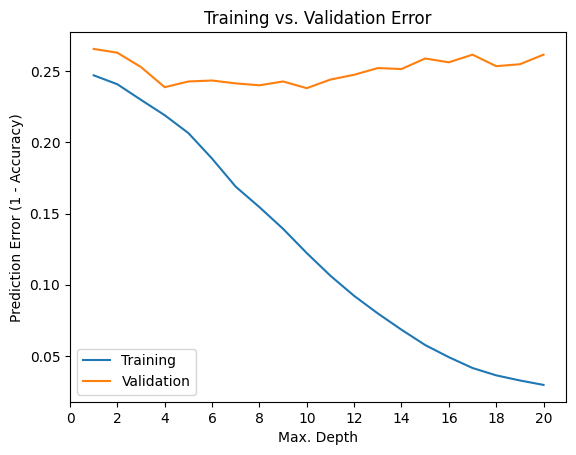

In [55]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0, 21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])


In [56]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)


In [57]:
model.fit(X_train, train_targets)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [58]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')


Accuracy: 78.09%
Precision: 75.52%
Recall: 78.09%
F1 Score: 74.42%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')


Accuracy: 76.13%
Precision: 71.02%
Recall: 76.13%
F1 Score: 72.75%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# The DT accuracy score got 74.92%


In [60]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')


Accuracy: 74.92%
Precision: 69.04%
Recall: 74.92%
F1 Score: 70.79%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random Forest


In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, train_targets)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [62]:
model.score(X_train, train_targets)


0.9941704035874439

In [63]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')


Accuracy: 99.42%
Precision: 99.42%
Recall: 99.42%
F1 Score: 99.41%


In [64]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')


Accuracy: 79.62%
Precision: 75.86%
Recall: 79.62%
F1 Score: 76.96%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')


Accuracy: 78.01%
Precision: 73.92%
Recall: 78.01%
F1 Score: 75.34%


In [66]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)


In [67]:
model.fit(X_train, train_targets)


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [68]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')


Accuracy: 98.57%
Precision: 98.58%
Recall: 98.57%
F1 Score: 98.55%


In [69]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')


Accuracy: 77.54%
Precision: 72.93%
Recall: 77.54%
F1 Score: 74.83%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')


Accuracy: 76.46%
Precision: 71.15%
Recall: 76.46%
F1 Score: 73.35%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SVM


# THE 72.56% SVM testing accuray


In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to predict and plot confusion matrix


def predict_and_plot(model, X, y, title):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"{title} accuracy: {accuracy*100:.2f}")
    print(f"{title} precision: {precision*100:.2f}")
    print(f"{title} recall: {recall*100:.2f}")
    print(f"{title} F1 score: {f1*100:.2f}")


# Create the SVM model
model_svm = SVC(random_state=42)

# Train the model

model_svm.fit(X_train, train_targets)

# Evaluate on training set
predict_and_plot(model_svm, X_train, train_targets, 'Training')

# Evaluate on validation set
predict_and_plot(model_svm, X_val, val_targets, 'Validation')

# Evaluate on test set
predict_and_plot(model_svm, X_test, test_targets, 'Test')


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training accuracy: 75.54
Training precision: 64.51
Training recall: 75.54
Training F1 score: 69.51


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation accuracy: 72.76
Validation precision: 62.06
Validation recall: 72.76
Validation F1 score: 66.97
Test accuracy: 72.56
Test precision: 61.36
Test recall: 72.56
Test F1 score: 66.39


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# BiLSTM


In [3]:
import pandas as pd 
import numpy as np


In [4]:
real_df = pd.read_csv("Raw_MAIN_DATASET_IMPUTATION_after_deleting_stai_badge_activity_step_goal.csv")
real_df.head(5)


,id,date,nightly_temperature,nremhr,rmssd,entropy,spo2,full_sleep_breathing_rate,full_sleep_standard_deviation,full_sleep_signal_to_noise,...,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,positive_affect_score,negative_affect_score,stai_stress,Emotions
0,621e2e8e67b776a24055b564,2021-05-24,0.771897,57.432,89.603,3.148,0.613208,0.496644,0.354839,0.548374,...,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.257143,0.666667,ALERT
1,621e2e8e67b776a24055b564,2021-05-25,0.741167,57.681,94.303,3.231,0.613208,0.530201,0.290323,0.370342,...,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.257143,0.666667,HAPPY
2,621e2e8e67b776a24055b564,2021-05-26,0.814285,57.481,119.212,3.360,0.613208,0.489933,0.354839,0.395794,...,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.257143,0.666667,HAPPY
3,621e2e8e67b776a24055b564,2021-05-27,0.796132,57.493,111.709,3.365,0.613208,0.496644,0.290323,0.594809,...,1.0,0.0,0.0,1.0,0.0,1.0,0.5,0.257143,0.666667,HAPPY
4,621e2e8e67b776a24055b564,2021-05-28,0.775589,56.750,103.034,3.262,0.613208,0.510067,0.516129,0.305433,...,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.257143,0.666667,HAPPY


In [5]:
# input
train_inputs = pd.read_csv("train_inputs.csv")
val_inputs = pd.read_csv("val_inputs.csv")
test_inputs = pd.read_csv("test_inputs.csv")
# target column
train_targets = pd.read_csv("train_targets.csv")
val_targets = pd.read_csv("val_targets.csv")
test_targets = pd.read_csv("test_targets.csv")


In [6]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)


train_inputs: (4460, 64)
train_targets: (4460, 1)
val_inputs: (1487, 64)
val_targets: (1487, 1)
test_inputs: (1487, 64)
test_targets: (1487, 1)


In [32]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming data is already preprocessed as sequences (X_train, X_val, X_test, etc.)
# and targets are in train_targets, val_targets, test_targets

# Define BiLSTM model
def create_bilstm_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False), input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification, change to softmax for multiclass
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to predict and plot accuracy metrics
def predict_and_plot_bilstm(model, X, y, title):
    y_pred = model.predict(X)
    y_pred_classes = np.round(y_pred)  # Round predictions to 0 or 1 (for binary classification)
    
    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='weighted')
    recall = recall_score(y, y_pred_classes, average='weighted')
    f1 = f1_score(y, y_pred_classes, average='weighted')
    
    print(f"{title} accuracy: {accuracy*100:.2f}")
    print(f"{title} precision: {precision*100:.2f}")
    print(f"{title} recall: {recall*100:.2f}")
    print(f"{title} F1 score: {f1*100:.2f}")

# Assuming your data is preprocessed as sequences
# Replace (X_train.shape[1], X_train.shape[2]) with the shape of your input data
input_shape = (X_train.shape[1], X_train.shape[2])  # Sequence length, number of features

# Create and train BiLSTM model
model_bilstm = create_bilstm_model(input_shape)

# Train the model
model_bilstm.fit(X_train, train_targets, validation_data=(X_val, val_targets), epochs=20, batch_size=32)

# Evaluate on training set
predict_and_plot_bilstm(model_bilstm, X_train, train_targets, 'Training')

# Evaluate on validation set
predict_and_plot_bilstm(model_bilstm, X_val, val_targets, 'Validation')

# Evaluate on test set
predict_and_plot_bilstm(model_bilstm, X_test, test_targets, 'Test')


NameError: name 'X_train' is not defined

In [35]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Combine all targets
combined_targets = pd.concat([train_targets, val_targets, test_targets])

# Fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(combined_targets)

# Now transform the individual target sets
train_targets_enc = label_encoder.transform(train_targets)
val_targets_enc = label_encoder.transform(val_targets)
test_targets_enc = label_encoder.transform(test_targets)

# Check the encoded values
print("Encoded Training Targets:", np.unique(train_targets_enc))
print("Encoded Validation Targets:", np.unique(val_targets_enc))
print("Encoded Test Targets:", np.unique(test_targets_enc))

# Step 2: Reshape inputs for LSTM (timesteps = 1, if not using sequential data)
X_train = train_inputs.values.reshape((train_inputs.shape[0], 1, train_inputs.shape[1]))
X_val = val_inputs.values.reshape((val_inputs.shape[0], 1, val_inputs.shape[1]))
X_test = test_inputs.values.reshape((test_inputs.shape[0], 1, test_inputs.shape[1]))

# Step 3: Define the BiLSTM model for multi-class classification
def create_bilstm_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False), input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # For multi-class classification
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Input shape (timesteps, features)
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(label_encoder.classes_)  # Correct number of classes

# Step 4: Create and train BiLSTM model
model_bilstm = create_bilstm_model(input_shape, num_classes)

# Train the model
history = model_bilstm.fit(X_train, train_targets_enc, validation_data=(X_val, val_targets_enc), epochs=20, batch_size=32)



Encoded Training Targets: [0 1 3 4 5 6 7 8]
Encoded Validation Targets: [0 2 3 4 5 6 7 8]
Encoded Test Targets: [0 3 4 5 6 7 8]


/home/fac/krishnandu/.local/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.5755 - loss: 1.6157 - val_accuracy: 0.7249 - val_loss: 1.0181
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7355 - loss: 1.1664 - val_accuracy: 0.7249 - val_loss: 0.9882
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7500 - loss: 1.0548 - val_accuracy: 0.7249 - val_loss: 0.9694
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7493 - loss: 1.0229 - val_accuracy: 0.7297 - val_loss: 0.9534
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7458 - loss: 1.0251 - val_accuracy: 0.7249 - val_loss: 0.9434
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7370 - loss: 1.0095 - val_accuracy: 0.7229 - val_loss: 0.9338
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7365 - loss: 1.0268 - val_accuracy: 0.7283 - val_loss: 0.9257
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7442 - loss: 0.9945 - val_acc

In [36]:
def predict_and_evaluate(model, X, y_true, title):
    y_pred = model.predict(X)  # Get predictions from the model
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    
    # Print metrics
    print(f"{title} Accuracy: {accuracy * 100:.2f}%")
    print(f"{title} Precision: {precision * 100:.2f}%")
    print(f"{title} Recall: {recall * 100:.2f}%")
    print(f"{title} F1 Score: {f1 * 100:.2f}%")


In [37]:
# Evaluate on the training set
predict_and_evaluate(model_bilstm, X_train, train_targets_enc, 'Training')

# Evaluate on the validation set
predict_and_evaluate(model_bilstm, X_val, val_targets_enc, 'Validation')

# Evaluate on the test set
predict_and_evaluate(model_bilstm, X_test, test_targets_enc, 'Test')


140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Accuracy: 74.53%
Training Precision: 60.09%
Training Recall: 74.53%
Training F1 Score: 65.79%
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Validation Accuracy: 71.89%
Validation Precision: 56.13%
Validation Recall: 71.89%
Validation F1 Score: 62.72%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Test Accuracy: 71.49%
Test Precision: 55.79%
Test Recall: 71.49%
Test F1 Score: 62.09%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Combine all targets
combined_targets = pd.concat([train_targets, val_targets, test_targets])

# Fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(combined_targets)

# Now transform the individual target sets
train_targets_enc = label_encoder.transform(train_targets)
val_targets_enc = label_encoder.transform(val_targets)
test_targets_enc = label_encoder.transform(test_targets)

# Check the encoded values
print("Encoded Training Targets:", np.unique(train_targets_enc))
print("Encoded Validation Targets:", np.unique(val_targets_enc))
print("Encoded Test Targets:", np.unique(test_targets_enc))

# Step 2: Reshape inputs for LSTM (timesteps = 1, if not using sequential data)
X_train = train_inputs.values.reshape((train_inputs.shape[0], 1, train_inputs.shape[1]))
X_val = val_inputs.values.reshape((val_inputs.shape[0], 1, val_inputs.shape[1]))
X_test = test_inputs.values.reshape((test_inputs.shape[0], 1, test_inputs.shape[1]))

# Step 3: Define the BiLSTM model for multi-class classification
def create_bilstm_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False), input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # For multi-class classification
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def predict_and_evaluate(model, X, y_true, title):
    y_pred = model.predict(X)  # Get predictions from the model
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    
    # Print metrics
    print(f"{title} Accuracy: {accuracy * 100:.2f}%")
    print(f"{title} Precision: {precision * 100:.2f}%")
    print(f"{title} Recall: {recall * 100:.2f}%")
    print(f"{title} F1 Score: {f1 * 100:.2f}%")


# Input shape (timesteps, features)
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(label_encoder.classes_)  # Correct number of classes

# Step 4: Create and train BiLSTM model
model_bilstm = create_bilstm_model(input_shape, num_classes)

# Train the model
history = model_bilstm.fit(X_train, train_targets_enc, validation_data=(X_val, val_targets_enc), epochs=50, batch_size=32)

# Evaluate on the training set
predict_and_evaluate(model_bilstm, X_train, train_targets_enc, 'Training')

# Evaluate on the validation set
predict_and_evaluate(model_bilstm, X_val, val_targets_enc, 'Validation')

# Evaluate on the test set
predict_and_evaluate(model_bilstm, X_test, test_targets_enc, 'Test')


Encoded Training Targets: [0 1 3 4 5 6 7 8]
Encoded Validation Targets: [0 2 3 4 5 6 7 8]
Encoded Test Targets: [0 3 4 5 6 7 8]


/home/fac/krishnandu/.local/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.5779 - loss: 1.4680 - val_accuracy: 0.7297 - val_loss: 0.9810
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7490 - loss: 1.0424 - val_accuracy: 0.7249 - val_loss: 0.9418
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7521 - loss: 0.9745 - val_accuracy: 0.7229 - val_loss: 0.9740
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7392 - loss: 1.0241 - val_accuracy: 0.7229 - val_loss: 0.9780
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7366 - loss: 1.0036 - val_accuracy: 0.7216 - val_loss: 0.9745
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7355 - loss: 1.0059 - val_accuracy: 0.7236 - val_loss: 0.9751
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7394 - loss: 1.0019 - val_accuracy: 0.7256 - val_loss: 0.9731
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7496 - loss: 0.9732 - val_acc

/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Validation Accuracy: 72.83%
Validation Precision: 58.58%
Validation Recall: 72.83%
Validation F1 Score: 63.54%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Test Accuracy: 72.23%
Test Precision: 57.28%
Test Recall: 72.23%
Test F1 Score: 62.43%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Combine all targets
combined_targets = pd.concat([train_targets, val_targets, test_targets])

# Fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(combined_targets)

# Now transform the individual target sets
train_targets_enc = label_encoder.transform(train_targets)
val_targets_enc = label_encoder.transform(val_targets)
test_targets_enc = label_encoder.transform(test_targets)

# Check the encoded values
print("Encoded Training Targets:", np.unique(train_targets_enc))
print("Encoded Validation Targets:", np.unique(val_targets_enc))
print("Encoded Test Targets:", np.unique(test_targets_enc))

# Step 2: Reshape inputs for LSTM (timesteps = 1, if not using sequential data)
X_train = train_inputs.values.reshape((train_inputs.shape[0], 1, train_inputs.shape[1]))
X_val = val_inputs.values.reshape((val_inputs.shape[0], 1, val_inputs.shape[1]))
X_test = test_inputs.values.reshape((test_inputs.shape[0], 1, test_inputs.shape[1]))

# Step 3: Define the BiLSTM model for multi-class classification
def create_bilstm_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False), input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # For multi-class classification
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def predict_and_evaluate(model, X, y_true, title):
    y_pred = model.predict(X)  # Get predictions from the model
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    
    # Print metrics
    print(f"{title} Accuracy: {accuracy * 100:.2f}%")
    print(f"{title} Precision: {precision * 100:.2f}%")
    print(f"{title} Recall: {recall * 100:.2f}%")
    print(f"{title} F1 Score: {f1 * 100:.2f}%")


# Input shape (timesteps, features)
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(label_encoder.classes_)  # Correct number of classes

# Step 4: Create and train BiLSTM model
model_bilstm = create_bilstm_model(input_shape, num_classes)

# Train the model
history = model_bilstm.fit(X_train, train_targets_enc, validation_data=(X_val, val_targets_enc), epochs=500, batch_size=32)

# Evaluate on the training set
predict_and_evaluate(model_bilstm, X_train, train_targets_enc, 'Training')

# Evaluate on the validation set
predict_and_evaluate(model_bilstm, X_val, val_targets_enc, 'Validation')

# Evaluate on the test set
predict_and_evaluate(model_bilstm, X_test, test_targets_enc, 'Test')


Encoded Training Targets: [0 1 3 4 5 6 7 8]
Encoded Validation Targets: [0 2 3 4 5 6 7 8]
Encoded Test Targets: [0 3 4 5 6 7 8]


/home/fac/krishnandu/.local/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.6518 - loss: 1.3205 - val_accuracy: 0.7189 - val_loss: 0.9671
Epoch 2/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7333 - loss: 1.0449 - val_accuracy: 0.7216 - val_loss: 0.9288
Epoch 3/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7412 - loss: 1.0219 - val_accuracy: 0.7270 - val_loss: 0.9071
Epoch 4/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7363 - loss: 0.9938 - val_accuracy: 0.7223 - val_loss: 0.8997
Epoch 5/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7472 - loss: 0.9598 - val_accuracy: 0.7189 - val_loss: 0.8985
Epoch 6/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7481 - loss: 0.9295 - val_accuracy: 0.7377 - val_loss: 0.8932
Epoch 7/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7460 - loss: 0.9124 - val_accuracy: 0.7384 - val_loss: 0.9036
Epoch 8/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7480 - loss: 0.9419 -

/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Validation Accuracy: 73.97%
Validation Precision: 65.88%
Validation Recall: 73.97%
Validation F1 Score: 67.18%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Test Accuracy: 73.30%
Test Precision: 63.68%
Test Recall: 73.30%
Test F1 Score: 66.04%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping

# Assuming train_inputs, val_inputs, test_inputs, train_targets, val_targets, test_targets are already defined

# Combine all targets
combined_targets = pd.concat([train_targets, val_targets, test_targets])

# Fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(combined_targets)

# Now transform the individual target sets
train_targets_enc = label_encoder.transform(train_targets)
val_targets_enc = label_encoder.transform(val_targets)
test_targets_enc = label_encoder.transform(test_targets)

# Check the encoded values
print("Encoded Training Targets:", np.unique(train_targets_enc))
print("Encoded Validation Targets:", np.unique(val_targets_enc))
print("Encoded Test Targets:", np.unique(test_targets_enc))

# Step 2: Reshape inputs for LSTM (timesteps = 1, if not using sequential data)
X_train = train_inputs.values.reshape((train_inputs.shape[0], 1, train_inputs.shape[1]))
X_val = val_inputs.values.reshape((val_inputs.shape[0], 1, val_inputs.shape[1]))
X_test = test_inputs.values.reshape((test_inputs.shape[0], 1, test_inputs.shape[1]))

# Step 3: Define the BiLSTM model for multi-class classification
def create_bilstm_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), input_shape=input_shape),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # For multi-class classification
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

def predict_and_evaluate(model, X, y_true, title):
    y_pred = model.predict(X)  # Get predictions from the model
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    
    # Print metrics
    print(f"{title} Accuracy: {accuracy * 100:.2f}%")
    print(f"{title} Precision: {precision * 100:.2f}%")
    print(f"{title} Recall: {recall * 100:.2f}%")
    print(f"{title} F1 Score: {f1 * 100:.2f}%")

# Input shape (timesteps, features)
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(label_encoder.classes_)  # Correct number of classes

# Step 4: Create and train BiLSTM model with early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

model_bilstm = create_bilstm_model(input_shape, num_classes)

# Train the model
history = model_bilstm.fit(X_train, train_targets_enc, 
                            validation_data=(X_val, val_targets_enc), 
                            epochs=100, 
                            batch_size=32, 
                            callbacks=[early_stopping])

# Evaluate on the training set
predict_and_evaluate(model_bilstm, X_train, train_targets_enc, 'Training')

# Evaluate on the validation set
predict_and_evaluate(model_bilstm, X_val, val_targets_enc, 'Validation')

# Evaluate on the test set
predict_and_evaluate(model_bilstm, X_test, test_targets_enc, 'Test')


Encoded Training Targets: [0 1 3 4 5 6 7 8]
Encoded Validation Targets: [0 2 3 4 5 6 7 8]
Encoded Test Targets: [0 3 4 5 6 7 8]


/home/fac/krishnandu/.local/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.5894 - loss: 1.5917 - val_accuracy: 0.7229 - val_loss: 0.9994
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.7427 - loss: 1.0562 - val_accuracy: 0.7317 - val_loss: 0.9231
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7498 - loss: 0.9960 - val_accuracy: 0.7357 - val_loss: 0.9143
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.7480 - loss: 1.0126 - val_accuracy: 0.7364 - val_loss: 0.9174
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7373 - loss: 0.9916 - val_accuracy: 0.7357 - val_loss: 0.9006
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7530 - loss: 0.9677 - val_accuracy: 0.7317 - val_loss: 0.8982
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7514 - loss: 0.9728 - val_accuracy: 0.7391 - val_loss: 0.8978
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.7540 - loss: 0.9189 -

/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Accuracy: 75.78%
Training Precision: 63.90%
Training Recall: 75.78%
Training F1 Score: 68.87%
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Validation Accuracy: 73.91%
Validation Precision: 61.60%
Validation Recall: 73.91%
Validation F1 Score: 66.90%
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step

/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Test Accuracy: 73.03%
Test Precision: 59.81%
Test Recall: 73.03%
Test F1 Score: 65.29%


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBOOST


In [42]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load your dataset
# train_inputs, val_inputs, test_inputs, train_targets, val_targets, test_targets should be defined

# Combine all targets for label encoding
combined_targets = pd.concat([train_targets, val_targets, test_targets])

# Fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(combined_targets)

# Transform the individual target sets
train_targets_enc = label_encoder.transform(train_targets)
val_targets_enc = label_encoder.transform(val_targets)
test_targets_enc = label_encoder.transform(test_targets)

# Check the encoded values
print("Encoded Training Targets:", np.unique(train_targets_enc))
print("Encoded Validation Targets:", np.unique(val_targets_enc))
print("Encoded Test Targets:", np.unique(test_targets_enc))

# Convert inputs to DMatrix format for XGBoost
dtrain = xgb.DMatrix(train_inputs, label=train_targets_enc)
dval = xgb.DMatrix(val_inputs, label=val_targets_enc)
dtest = xgb.DMatrix(test_inputs, label=test_targets_enc)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(label_encoder.classes_),  # Number of classes
    'max_depth': 6,  # Maximum depth of the tree
    'eta': 0.3,  # Learning rate
    'eval_metric': 'mlogloss'  # Evaluation metric
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds=10)

# Make predictions
train_preds = bst.predict(dtrain)
val_preds = bst.predict(dval)
test_preds = bst.predict(dtest)

# Evaluate the model
def evaluate(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{title} Accuracy: {accuracy * 100:.2f}%")
    print(f"{title} Precision: {precision * 100:.2f}%")
    print(f"{title} Recall: {recall * 100:.2f}%")
    print(f"{title} F1 Score: {f1 * 100:.2f}%")

# Evaluate on the training set
evaluate(train_targets_enc, train_preds, 'Training')

# Evaluate on the validation set
evaluate(val_targets_enc, val_preds, 'Validation')

# Evaluate on the test set
evaluate(test_targets_enc, test_preds, 'Test')


Encoded Training Targets: [0 1 3 4 5 6 7 8]
Encoded Validation Targets: [0 2 3 4 5 6 7 8]
Encoded Test Targets: [0 3 4 5 6 7 8]
[0]	eval-mlogloss:1.42616
[1]	eval-mlogloss:1.18663
[2]	eval-mlogloss:1.03971
[3]	eval-mlogloss:0.94232
[4]	eval-mlogloss:0.87123
[5]	eval-mlogloss:0.82196
[6]	eval-mlogloss:0.78441
[7]	eval-mlogloss:0.75597
[8]	eval-mlogloss:0.73904
[9]	eval-mlogloss:0.72468
[10]	eval-mlogloss:0.71521
[11]	eval-mlogloss:0.70855
[12]	eval-mlogloss:0.70169
[13]	eval-mlogloss:0.69704
[14]	eval-mlogloss:0.69336
[15]	eval-mlogloss:0.69127
[16]	eval-mlogloss:0.68882
[17]	eval-mlogloss:0.68785
[18]	eval-mlogloss:0.68659
[19]	eval-mlogloss:0.68587
[20]	eval-mlogloss:0.68518
[21]	eval-mlogloss:0.68644
[22]	eval-mlogloss:0.68716
[23]	eval-mlogloss:0.68619
[24]	eval-mlogloss:0.68735
[25]	eval-mlogloss:0.68812
[26]	eval-mlogloss:0.68894
[27]	eval-mlogloss:0.69032
[28]	eval-mlogloss:0.69207
[29]	eval-mlogloss:0.69327
Training Accuracy: 96.95%
Training Precision: 96.95%
Training Recall: 96

/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBOOST 78.41% accuracy got here


In [43]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Load your dataset
# train_inputs, val_inputs, test_inputs, train_targets, val_targets, test_targets should be defined

# Combine all targets for label encoding
combined_targets = pd.concat([train_targets, val_targets, test_targets])

# Fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(combined_targets)

# Transform the individual target sets
train_targets_enc = label_encoder.transform(train_targets)
val_targets_enc = label_encoder.transform(val_targets)
test_targets_enc = label_encoder.transform(test_targets)

# Check the encoded values
print("Encoded Training Targets:", np.unique(train_targets_enc))
print("Encoded Validation Targets:", np.unique(val_targets_enc))
print("Encoded Test Targets:", np.unique(test_targets_enc))

# Convert inputs to DMatrix format for XGBoost
dtrain = xgb.DMatrix(train_inputs, label=train_targets_enc)
dval = xgb.DMatrix(val_inputs, label=val_targets_enc)
dtest = xgb.DMatrix(test_inputs, label=test_targets_enc)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(label_encoder.classes_),  # Number of classes
    'max_depth': 8,  # Increased depth
    'eta': 0.1,  # Decreased learning rate
    'eval_metric': 'mlogloss',  # Evaluation metric
    'subsample': 0.8,  # Subsample ratio of the training instance
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'gamma': 0.2,  # Minimum loss reduction required to make a further partition
    'lambda': 1,  # L2 regularization term on weights
    'alpha': 0.5  # L1 regularization term on weights
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=200, evals=[(dval, 'eval')], early_stopping_rounds=10)

# Make predictions
train_preds = bst.predict(dtrain)
val_preds = bst.predict(dval)
test_preds = bst.predict(dtest)

# Evaluate the model
def evaluate(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{title} Accuracy: {accuracy * 100:.2f}%")
    print(f"{title} Precision: {precision * 100:.2f}%")
    print(f"{title} Recall: {recall * 100:.2f}%")
    print(f"{title} F1 Score: {f1 * 100:.2f}%")

# Evaluate on the training set
evaluate(train_targets_enc, train_preds, 'Training')

# Evaluate on the validation set
evaluate(val_targets_enc, val_preds, 'Validation')

# Evaluate on the test set
evaluate(test_targets_enc, test_preds, 'Test')


Encoded Training Targets: [0 1 3 4 5 6 7 8]
Encoded Validation Targets: [0 2 3 4 5 6 7 8]
Encoded Test Targets: [0 3 4 5 6 7 8]
[0]	eval-mlogloss:1.91439
[1]	eval-mlogloss:1.72314
[2]	eval-mlogloss:1.58075
[3]	eval-mlogloss:1.46629
[4]	eval-mlogloss:1.37153
[5]	eval-mlogloss:1.29152
[6]	eval-mlogloss:1.22112
[7]	eval-mlogloss:1.16161
[8]	eval-mlogloss:1.10936
[9]	eval-mlogloss:1.06180
[10]	eval-mlogloss:1.02156
[11]	eval-mlogloss:0.98497
[12]	eval-mlogloss:0.95395
[13]	eval-mlogloss:0.92458
[14]	eval-mlogloss:0.89886
[15]	eval-mlogloss:0.87422
[16]	eval-mlogloss:0.85245
[17]	eval-mlogloss:0.83396
[18]	eval-mlogloss:0.81760
[19]	eval-mlogloss:0.80356
[20]	eval-mlogloss:0.79098
[21]	eval-mlogloss:0.77910
[22]	eval-mlogloss:0.76818
[23]	eval-mlogloss:0.75838
[24]	eval-mlogloss:0.74974
[25]	eval-mlogloss:0.74091
[26]	eval-mlogloss:0.73337
[27]	eval-mlogloss:0.72671
[28]	eval-mlogloss:0.72153
[29]	eval-mlogloss:0.71566
[30]	eval-mlogloss:0.71168
[31]	eval-mlogloss:0.70826
[32]	eval-mlogloss

/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [45]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Load your dataset
# train_inputs, val_inputs, test_inputs, train_targets, val_targets, test_targets should be defined

# Combine all targets for label encoding
combined_targets = pd.concat([train_targets, val_targets, test_targets])

# Fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(combined_targets)

# Transform the individual target sets
train_targets_enc = label_encoder.transform(train_targets)
val_targets_enc = label_encoder.transform(val_targets)
test_targets_enc = label_encoder.transform(test_targets)

# Check the encoded values
print("Encoded Training Targets:", np.unique(train_targets_enc))
print("Encoded Validation Targets:", np.unique(val_targets_enc))
print("Encoded Test Targets:", np.unique(test_targets_enc))

# Check the class distribution
print("Training class distribution:", np.bincount(train_targets_enc))

# Convert inputs to DMatrix format for XGBoost
dtrain = xgb.DMatrix(train_inputs, label=train_targets_enc)
dval = xgb.DMatrix(val_inputs, label=val_targets_enc)
dtest = xgb.DMatrix(test_inputs, label=test_targets_enc)

# Parameter grid for GridSearchCV
param_grid = {
    'max_depth': [6, 8, 10],  # Depth of trees
    'eta': [0.05, 0.1, 0.2],   # Learning rate
    'subsample': [0.7, 0.8, 0.9],  # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9],  # Subsample ratio of columns
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
    'lambda': [0, 1],        # L2 regularization term
    'alpha': [0, 0.5]        # L1 regularization term
}

# Set up the model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), eval_metric='mlogloss')

# Set up stratified K-Folds cross-validation
stratified_kfold = StratifiedKFold(n_splits=3)

# Perform grid search with stratified K-Folds
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=stratified_kfold, verbose=2)
grid_search.fit(train_inputs, train_targets_enc)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(train_inputs, train_targets_enc)

# Make predictions
train_preds = best_model.predict(train_inputs)
val_preds = best_model.predict(val_inputs)
test_preds = best_model.predict(test_inputs)

# Evaluate the model
def evaluate(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{title} Accuracy: {accuracy * 100:.2f}%")
    print(f"{title} Precision: {precision * 100:.2f}%")
    print(f"{title} Recall: {recall * 100:.2f}%")
    print(f"{title} F1 Score: {f1 * 100:.2f}%")

# Evaluate on the training set
evaluate(train_targets_enc, train_preds, 'Training')

# Evaluate on the validation set
evaluate(val_targets_enc, val_preds, 'Validation')

# Evaluate on the test set
evaluate(test_targets_enc, test_preds, 'Test')


Encoded Training Targets: [0 1 3 4 5 6 7 8]
Encoded Validation Targets: [0 2 3 4 5 6 7 8]
Encoded Test Targets: [0 3 4 5 6 7 8]
Training class distribution: [3302    2    0  321  265  288   40  117  125]
Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=6, subsample=0.7; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=6, subsample=0.7; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=6, subsample=0.7; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=6, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=6, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=6, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0

/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=6, subsample=0.9; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=6, subsample=0.9; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=8, subsample=0.7; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=8, subsample=0.7; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=8, subsample=0.7; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=8, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=8, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max_depth=8, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.7, eta=0.05, gamma=0, lambda=0, max

ValueError: 
All the 2916 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2916 fits failed with the following error:
Traceback (most recent call last):
  File "/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/fac/krishnandu/.local/lib/python3.11/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/fac/krishnandu/.local/lib/python3.11/site-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7], got [0 1 3 4 5 6 7 8]


In [50]:
# Cross-validation to check performance before final model training
cv_results = xgb.cv(
    params=params, 
    dtrain=dtrain, 
    num_boost_round=200, 
    nfold=5,  # 5-fold cross-validation
    metrics='mlogloss', 
    early_stopping_rounds=10, 
    verbose_eval=True
)

print("CV Results:", cv_results)

# After determining best rounds from cross-validation
best_num_boost_rounds = len(cv_results)

# Retrain the final model with the best number of boosting rounds
bst = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds, evals=[(dval, 'eval')])

# Predictions and evaluations as before
train_preds = bst.predict(dtrain)
val_preds = bst.predict(dval)
test_preds = bst.predict(dtest)

evaluate(train_targets_enc, train_preds, 'Training')
evaluate(val_targets_enc, val_preds, 'Validation')
evaluate(test_targets_enc, test_preds, 'Test')


[0]	train-mlogloss:1.88556+0.00231	test-mlogloss:1.90834+0.00472
[1]	train-mlogloss:1.67088+0.00282	test-mlogloss:1.71295+0.00764
[2]	train-mlogloss:1.50488+0.00364	test-mlogloss:1.56575+0.00973
[3]	train-mlogloss:1.37137+0.00454	test-mlogloss:1.44960+0.01140
[4]	train-mlogloss:1.25893+0.00469	test-mlogloss:1.35345+0.01360
[5]	train-mlogloss:1.16250+0.00463	test-mlogloss:1.27175+0.01550
[6]	train-mlogloss:1.07758+0.00465	test-mlogloss:1.20129+0.01695
[7]	train-mlogloss:1.00273+0.00469	test-mlogloss:1.14038+0.01922
[8]	train-mlogloss:0.93664+0.00464	test-mlogloss:1.08702+0.02062
[9]	train-mlogloss:0.87746+0.00486	test-mlogloss:1.04066+0.02229
[10]	train-mlogloss:0.82402+0.00532	test-mlogloss:0.99991+0.02363
[11]	train-mlogloss:0.77570+0.00530	test-mlogloss:0.96354+0.02441
[12]	train-mlogloss:0.73290+0.00512	test-mlogloss:0.93186+0.02550
[13]	train-mlogloss:0.69292+0.00540	test-mlogloss:0.90302+0.02701
[14]	train-mlogloss:0.65652+0.00552	test-mlogloss:0.87771+0.02808
[15]	train-mlogloss:

/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have a DataFrame named 'data' that contains your input features and the 'Emotions' column
# Split your data into train, validation, and test sets
from sklearn.model_selection import train_test_split

# Example DataFrame
data = pd.read_csv("Raw_MAIN_DATASET_IMPUTATION_after_deleting_stai_badge_activity_step_goal.csv")
# Replace 'your_dataset.csv' with the path to your actual dataset
# Combine all targets
combined_targets = pd.concat([train_targets, val_targets, test_targets])

# Fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(combined_targets)

# Transform the individual target sets
train_targets_enc = label_encoder.transform(train_targets)
val_targets_enc = label_encoder.transform(val_targets)
test_targets_enc = label_encoder.transform(test_targets)

# Check the encoded values
print("Encoded Training Targets:", np.unique(train_targets_enc))
print("Encoded Validation Targets:", np.unique(val_targets_enc))
print("Encoded Test Targets:", np.unique(test_targets_enc))

# Step 2: Reshape inputs for LSTM (timesteps = 1, if not using sequential data)
X_train = train_inputs.values.reshape((train_inputs.shape[0], 1, train_inputs.shape[1]))
X_val = val_inputs.values.reshape((val_inputs.shape[0], 1, val_inputs.shape[1]))
X_test = test_inputs.values.reshape((test_inputs.shape[0], 1, test_inputs.shape[1]))

# Step 3: Randomly sample data to balance classes
def random_sample(X, y, target_column, n_samples):
    df = pd.DataFrame(X.reshape(X.shape[0], X.shape[2]))  # Reshape back to DataFrame
    df[target_column] = y
    df_sampled = df.groupby(target_column).apply(lambda x: x.sample(n=n_samples, replace=True)).reset_index(drop=True)
    
    X_sampled = df_sampled.drop(columns=[target_column]).values.reshape((df_sampled.shape[0], 1, df_sampled.shape[1]-1))
    y_sampled = df_sampled[target_column].values
    return X_sampled, y_sampled

# Define the number of samples per class (update based on your dataset)
n_samples_per_class = min(np.bincount(train_targets_enc))  # For balanced sampling
X_train_sampled, train_targets_enc_sampled = random_sample(X_train, train_targets_enc, 'Emotions', n_samples_per_class)
X_val_sampled, val_targets_enc_sampled = random_sample(X_val, val_targets_enc, 'Emotions', n_samples_per_class)

# Step 4: Define the BiLSTM model for multi-class classification
def create_bilstm_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True), input_shape=input_shape),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # For multi-class classification
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

def predict_and_evaluate(model, X, y_true, title):
    y_pred = model.predict(X)  # Get predictions from the model
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    
    # Print metrics
    print(f"{title} Accuracy: {accuracy * 100:.2f}%")
    print(f"{title} Precision: {precision * 100:.2f}%")
    print(f"{title} Recall: {recall * 100:.2f}%")
    print(f"{title} F1 Score: {f1 * 100:.2f}%")

# Input shape (timesteps, features)
input_shape = (X_train_sampled.shape[1], X_train_sampled.shape[2])
num_classes = len(label_encoder.classes_)  # Correct number of classes

# Step 5: Create and train BiLSTM model with early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

model_bilstm = create_bilstm_model(input_shape, num_classes)

# Ensure the input data is in float32 format
X_train_sampled = X_train_sampled.astype(np.float32)
X_val_sampled = X_val_sampled.astype(np.float32)
X_test = X_test.astype(np.float32)  # Ensure test data is also in float32

# Check for NaN or infinite values
print("NaN in X_train_sampled:", np.isnan(X_train_sampled).any())
print("Infinite in X_train_sampled:", np.isinf(X_train_sampled).any())

# Train the model
history = model_bilstm.fit(X_train_sampled, train_targets_enc_sampled, 
                            validation_data=(X_val_sampled, val_targets_enc_sampled), 
                            epochs=100, 
                            batch_size=32, 
                            callbacks=[early_stopping])

# Evaluate on the training set
predict_and_evaluate(model_bilstm, X_train_sampled, train_targets_enc_sampled, 'Training')

# Evaluate on the validation set
predict_and_evaluate(model_bilstm, X_val_sampled, val_targets_enc_sampled, 'Validation')

# Evaluate on the test set
predict_and_evaluate(model_bilstm, X_test, test_targets_enc, 'Test')


/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/fac/krishnandu/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: Data

Encoded Training Targets: [0 1 2 3 4 5 6 7 8]
Encoded Validation Targets: [0 3 4 5 6 7 8]
Encoded Test Targets: [0 3 4 5 6 7 8]


/home/fac/krishnandu/.local/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: could not convert string to float: '621e356967b776a24027bd9f'

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# Load the dataset
data = pd.read_csv("Raw_MAIN_DATASET_IMPUTATION_after_deleting_stai_badge_activity_step_goal.csv")

# Check for missing values
print("Missing values in dataset:\n", data.isnull().sum())

# Encode the target variable
label_encoder = LabelEncoder()
data['Emotions'] = label_encoder.fit_transform(data['Emotions'])

# Split the data into features and target
X = data.drop('Emotions', axis=1)  # Adjust if your features are in different columns
y = data['Emotions']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# If your features are text data, preprocess them for BiLSTM
max_words = 1000  # Maximum number of words to consider
max_len = 100  # Maximum length of sequences

# Assuming one of the features is text, change 'your_text_column' to your actual column name
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train['your_text_column'])  # Replace 'your_text_column' with the name of the text feature

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train['your_text_column'])
X_test_seq = tokenizer.texts_to_sequences(X_test['your_text_column'])

# Pad the sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Define the BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


Missing values in dataset:
 id                       0
date                     0
nightly_temperature      0
nremhr                   0
rmssd                    0
                        ..
WORK/SCHOOL              0
positive_affect_score    0
negative_affect_score    0
stai_stress              0
Emotions                 0
Length: 67, dtype: int64


KeyError: 'your_text_column'

In [12]:
!pip install tensorflow



Defaulting to user installation because normal site-packages is not writeable


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# Load the dataset
data = pd.read_csv("Raw_MAIN_DATASET_IMPUTATION_after_deleting_stai_badge_activity_step_goal.csv")

# Check for missing values
print("Missing values in dataset:\n", data.isnull().sum())

# Encode the target variable
label_encoder = LabelEncoder()
data['Emotions'] = label_encoder.fit_transform(data['Emotions'])

# Split the data into features and target
X = data.drop('Emotions', axis=1)  # Adjust if your features are in different columns
y = data['Emotions']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Assuming one of the features is text, change 'your_text_column' to your actual column name
text_column = 'your_text_column'  # Replace with your actual text column name

# If the text column exists, preprocess it for BiLSTM
if text_column in X_train.columns:
    max_words = 1000  # Maximum number of words to consider
    max_len = 100  # Maximum length of sequences

    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(X_train[text_column])  # Fit the tokenizer on the training text data

    # Convert text to sequences
    X_train_seq = tokenizer.texts_to_sequences(X_train[text_column])
    X_test_seq = tokenizer.texts_to_sequences(X_test[text_column])

    # Pad the sequences
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

    # Define the BiLSTM model
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for the number of classes

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_pad, y_test)
    print(f'Test Accuracy: {accuracy:.4f}')
else:
    print(f"Column '{text_column}' not found in dataset. Please check the column name.")


Missing values in dataset:
 id                       0
date                     0
nightly_temperature      0
nremhr                   0
rmssd                    0
                        ..
WORK/SCHOOL              0
positive_affect_score    0
negative_affect_score    0
stai_stress              0
Emotions                 0
Length: 67, dtype: int64
Column 'your_text_column' not found in dataset. Please check the column name.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# Load the dataset
data = pd.read_csv("Raw_MAIN_DATASET_IMPUTATION_after_deleting_stai_badge_activity_step_goal.csv")

# Check for missing values
print("Missing values in dataset:\n", data.isnull().sum())

# Display the first few rows of the dataset
print(data.head())

# Display the columns of the dataset
print("Columns in the dataset:\n", data.columns)

# Encode the target variable
label_encoder = LabelEncoder()
data['Emotions'] = label_encoder.fit_transform(data['Emotions'])

# Split the data into features and target
X = data.drop('Emotions', axis=1)  # Adjust if your features are in different columns
y = data['Emotions']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Assuming the text column is called 'review' (replace with your actual text column name)
text_column = 'review'  # Update this to your actual text column name

# If the text column exists, preprocess it for BiLSTM
if text_column in X_train.columns:
    max_words = 1000  # Maximum number of words to consider
    max_len = 100  # Maximum length of sequences

    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(X_train[text_column])  # Fit the tokenizer on the training text data

    # Convert text to sequences
    X_train_seq = tokenizer.texts_to_sequences(X_train[text_column])
    X_test_seq = tokenizer.texts_to_sequences(X_test[text_column])

    # Pad the sequences
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

    # Define the BiLSTM model
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for the number of classes

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_pad, y_test)
    print(f'Test Accuracy: {accuracy:.4f}')
else:
    print(f"Column '{text_column}' not found in dataset. Please check the column name.")


Missing values in dataset:
 id                       0
date                     0
nightly_temperature      0
nremhr                   0
rmssd                    0
                        ..
WORK/SCHOOL              0
positive_affect_score    0
negative_affect_score    0
stai_stress              0
Emotions                 0
Length: 67, dtype: int64
                         id        date  nightly_temperature  nremhr    rmssd  \
0  621e2e8e67b776a24055b564  2021-05-24             0.771897  57.432   89.603   
1  621e2e8e67b776a24055b564  2021-05-25             0.741167  57.681   94.303   
2  621e2e8e67b776a24055b564  2021-05-26             0.814285  57.481  119.212   
3  621e2e8e67b776a24055b564  2021-05-27             0.796132  57.493  111.709   
4  621e2e8e67b776a24055b564  2021-05-28             0.775589  56.750  103.034   

   entropy      spo2  full_sleep_breathing_rate  \
0    3.148  0.613208                   0.496644   
1    3.231  0.613208                   0.530201   
2    3.360

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv("Raw_MAIN_DATASET_IMPUTATION_after_deleting_stai_badge_activity_step_goal.csv")

# Check for missing values
print("Missing values in dataset:\n", data.isnull().sum())

# Encode the target variable
label_encoder = LabelEncoder()
data['Emotions'] = label_encoder.fit_transform(data['Emotions'])

# Split the data into features and target
X = data.drop(['Emotions', 'id', 'date'], axis=1)  # Drop non-numeric features
y = data['Emotions']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a simple feedforward neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


Missing values in dataset:
 id                       0
date                     0
nightly_temperature      0
nremhr                   0
rmssd                    0
                        ..
WORK/SCHOOL              0
positive_affect_score    0
negative_affect_score    0
stai_stress              0
Emotions                 0
Length: 67, dtype: int64


/home/fac/krishnandu/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.3615 - loss: 1.7878 - val_accuracy: 0.5979 - val_loss: 1.1807
Epoch 2/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5432 - loss: 1.2393 - val_accuracy: 0.6562 - val_loss: 1.0036
Epoch 3/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5979 - loss: 1.0951 - val_accuracy: 0.6814 - val_loss: 0.8991
Epoch 4/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6266 - loss: 1.0047 - val_accuracy: 0.7079 - val_loss: 0.8253
Epoch 5/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6501 - loss: 0.9443 - val_accuracy: 0.7404 - val_loss: 0.7782
Epoch 6/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6645 - loss: 0.8924 - val_accuracy: 0.7504 - val_loss: 0.7287
Epoch 7/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.6809 - loss: 0.8653 - val_accuracy: 0.7741 - val_loss: 0.6825
Epoch 8/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6841 -

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv("Raw_MAIN_DATASET_IMPUTATION_after_deleting_stai_badge_activity_step_goal.csv")

# Check for missing values
print("Missing values in dataset:\n", data.isnull().sum())

# Encode the target variable
label_encoder = LabelEncoder()
data['Emotions'] = label_encoder.fit_transform(data['Emotions'])

# Split the data into features and target
X = data.drop(['Emotions', 'id', 'date'], axis=1)  # Drop non-numeric features
y = data['Emotions']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a simple feedforward neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


2024-10-04 17:14:50.603437: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 17:14:50.683489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 17:14:50.787727: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 17:14:50.810425: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 17:14:50.872297: I tensorflow/core/platform/cpu_feature_guar

Missing values in dataset:
 id                       0
date                     0
nightly_temperature      0
nremhr                   0
rmssd                    0
                        ..
WORK/SCHOOL              0
positive_affect_score    0
negative_affect_score    0
stai_stress              0
Emotions                 0
Length: 67, dtype: int64


/home/fac/krishnandu/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-04 17:14:57.470586: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.3641 - loss: 1.7967 - val_accuracy: 0.5970 - val_loss: 1.1654
Epoch 2/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.5367 - loss: 1.2446 - val_accuracy: 0.6601 - val_loss: 0.9881
Epoch 3/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5919 - loss: 1.0983 - val_accuracy: 0.6983 - val_loss: 0.8840
Epoch 4/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6277 - loss: 1.0077 - val_accuracy: 0.7113 - val_loss: 0.8178
Epoch 5/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6440 - loss: 0.9535 - val_accuracy: 0.7271 - val_loss: 0.7790
Epoch 6/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6618 - loss: 0.9084 - val_accuracy: 0.7433 - val_loss: 0.7311
Epoch 7/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.6753 - loss: 0.8740 - val_accuracy: 0.7686 - val_loss: 0.6880
Epoch 8/20
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6834 -